In [69]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
# Read Data
df = pd.read_csv('aapl_ok.csv',sep=';')
df['fecha'] = pd.to_datetime(df['fecha'])
df = df.set_index('fecha')
df.tail()

,Trimeste,Ingresos
fecha,,
2020-06-27,Q3 2020,59685
2020-09-26,Q4 2020,64698
2020-12-26,Q1 2021,111439
2021-03-27,Q2 2021,89584
2021-06-26,Q3 2021,81434


In [71]:
df.dtypes

Trimeste    object
Ingresos    object
dtype: object

In [72]:
df['Ingresos'] = df['Ingresos'].str.replace(',', '.').astype('float64')
df.head()
df.dtypes

Trimeste     object
Ingresos    float64
dtype: object

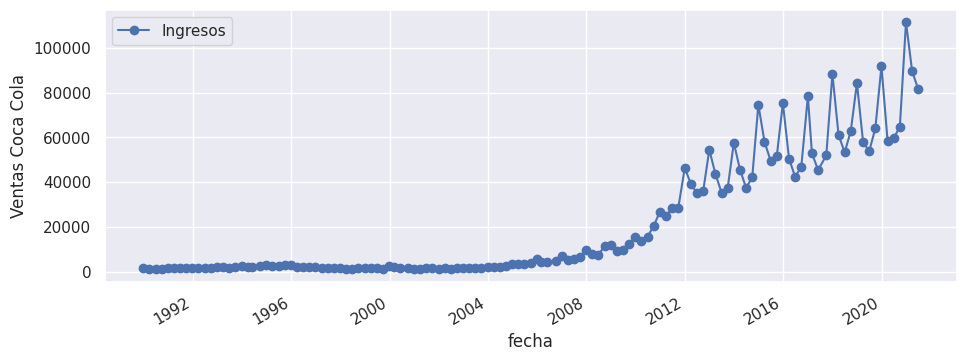

In [73]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
ax = df.plot( y = 'Ingresos', marker='o', linestyle='-')
ax.set_ylabel('Ventas Coca Cola');

son estacionarios y tienen una tendencia alcista. varianza no constante

In [74]:
trimestral=df.resample("q").last()
#ko_ts=ko_df['Ingresos'].astype('float64').to_period('Q')
trimestral.tail()

,Trimeste,Ingresos
fecha,,
2020-06-30,Q3 2020,59685.0
2020-09-30,Q4 2020,64698.0
2020-12-31,Q1 2021,111439.0
2021-03-31,Q2 2021,89584.0
2021-06-30,Q3 2021,81434.0


In [75]:
import statsmodels.api as sm

Text(0.5, 1.0, 'Comportamiento Estacional')

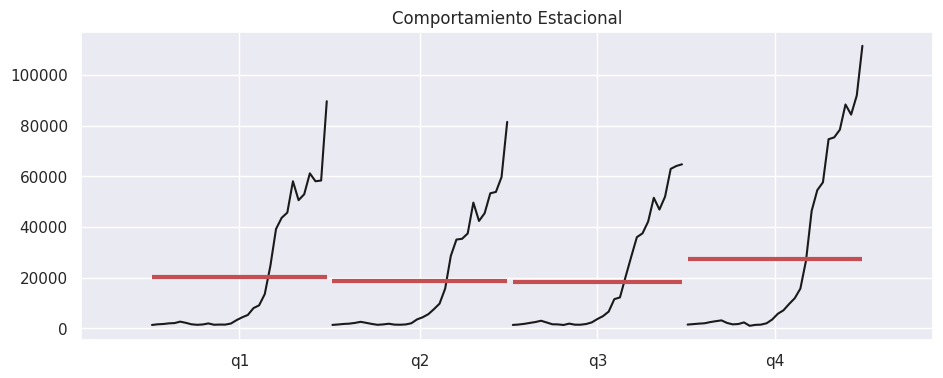

In [76]:
ax = plt.gca()
sm.graphics.tsa.quarter_plot(trimestral['Ingresos'],ax=ax)
ax.set_title('Comportamiento Estacional')

In [77]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

119 8


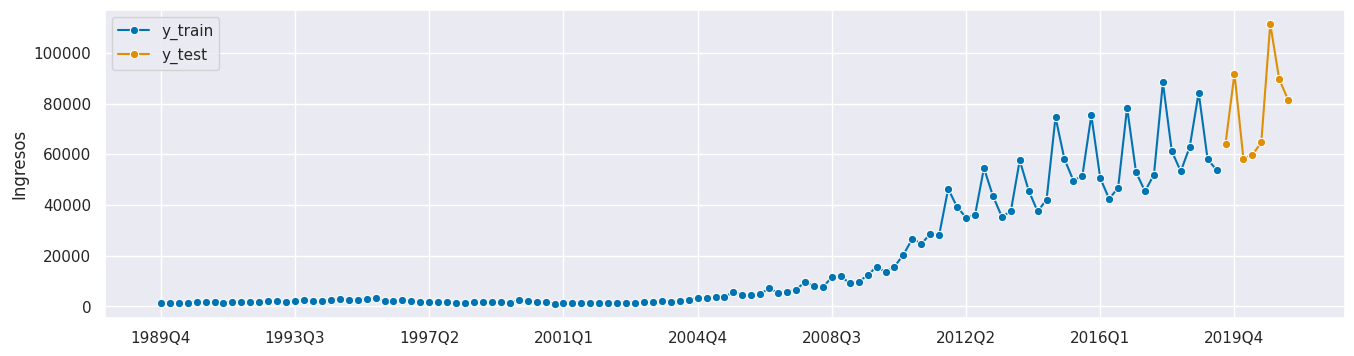

In [79]:
y_train, y_test = temporal_train_test_split(y = trimestral['Ingresos'].astype('float64').to_period('Q'), test_size=8)
# we will try to forecast y_test from y_train
# plotting for illustration
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [80]:
from sktime.forecasting.ets import AutoETS

In [81]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 15)

# step 3: specifying the forecasting algorithm
aapl_auto_model = AutoETS(auto=True, sp=4, n_jobs=-1)

aapl_auto_model.fit(y_train)
print(aapl_auto_model.summary())

                                 ETS Results                                  
Dep. Variable:               Ingresos   No. Observations:                  119
Model:                       ETS(MAM)   Log Likelihood                -968.025
Date:                Sat, 07 Oct 2023   AIC                           1956.050
Time:                        17:41:47   BIC                           1983.841
Sample:                    12-31-1989   HQIC                          1967.335
                         - 06-30-2019   Scale                            0.018
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.4225      0.055      7.739      0.000       0.316       0.530
smoothing_trend        0.1685      0.034      4.890      0.000       0.101       0.236
smoothing_seasonal  

In [82]:
# step 5: querying predictions
aapl_pred = aapl_auto_model.predict(fh)
print(aapl_pred)

2019Q3    58581.326742
2019Q4    85963.040159
2020Q1    59751.798679
2020Q2    53079.526151
2020Q3    58323.465808
2020Q4    85584.234646
2021Q1    59488.205472
2021Q2    52845.108937
2021Q3    58065.604875
2021Q4    85205.429133
2022Q1    59224.612265
2022Q2    52610.691722
2022Q3    57807.743942
2022Q4    84826.623619
Freq: Q-DEC, Name: Ingresos, dtype: float64


In [84]:
aapl_pred_ints = aapl_auto_model.predict_interval(fh, coverage=0.9)
aapl_pred_ints

Ingresos               
                 0.9               
               lower          upper
2019Q3  45924.579343   72321.442191
2019Q4  64764.496743  109778.148287
2020Q1  42723.585864   80147.955916
2020Q2  35002.841017   74451.717159
2020Q3  33223.666871   91265.952126
2020Q4  44698.412822  144056.593456
2021Q1  26810.057114  104742.528222
2021Q2  18824.708739   97207.088585
2021Q3  15378.785595  123396.304112
2021Q4  16489.074979  196830.206377
2022Q1   7238.163687  140514.745909
2022Q2   1443.245559  133974.106387
2022Q3  -2942.706220  169396.644031
2022Q4 -11265.327463  268221.597495

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

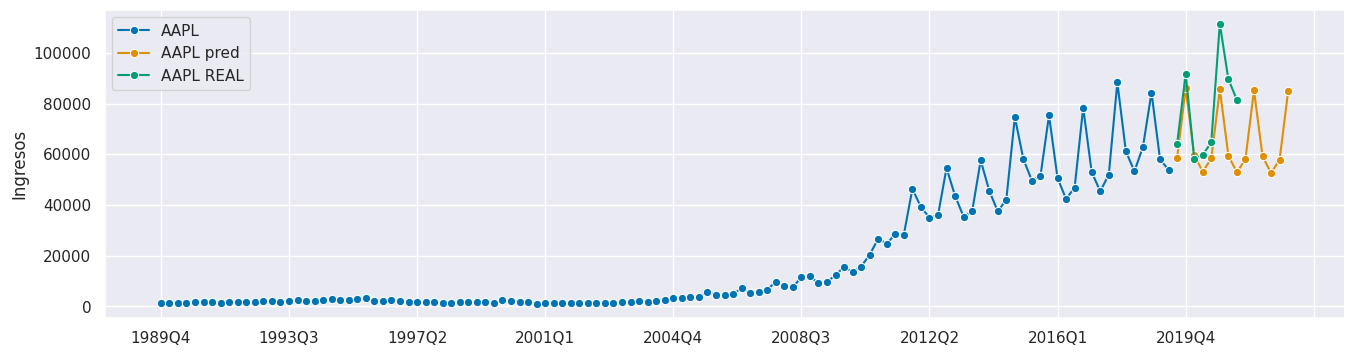

In [85]:
# optional: plotting predictions and past data
plot_series(y_train, aapl_pred,y_test, labels=["AAPL", "AAPL pred", "AAPL REAL"])

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

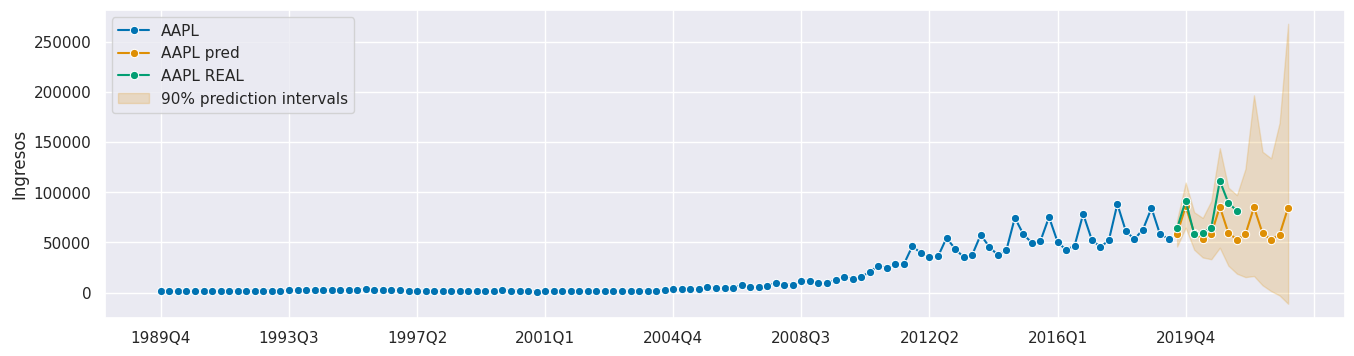

In [86]:
fig, ax = plot_series(y_train, aapl_pred, y_test, labels=["AAPL", "AAPL pred", "AAPL REAL"])
ax.fill_between(
    ax.get_lines()[-2].get_xdata(),
    aapl_pred_ints[('Ingresos', 0.9, 'lower')],
    aapl_pred_ints[('Ingresos', 0.9, 'upper')],
    alpha=0.2,
    color=ax.get_lines()[-2].get_c(),
    label=f"90% prediction intervals",
)
ax.legend(loc='upper left')

In [88]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
# option 1: using the lean function interface
mean_absolute_percentage_error(y_test, aapl_pred[0:8])

0.16273953082780607

In [89]:
from sktime.performance_metrics.forecasting import MeanSquaredError
mse = MeanSquaredError()
mse(y_test, aapl_pred[0:8])

317747115.49760485

In [90]:
rmse = MeanSquaredError(square_root=True)
rmse(y_test, aapl_pred[0:8])

17825.462560550983

In [91]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 7)

# step 3: specifying the forecasting algorithm
aapl_auto_model = AutoETS(auto=True, sp=4, n_jobs=-1)

y = trimestral['Ingresos'].astype('float64').to_period('Q')

aapl_auto_model.fit(y)

print(aapl_auto_model.summary())

                                 ETS Results                                  
Dep. Variable:               Ingresos   No. Observations:                  127
Model:                       ETS(MAM)   Log Likelihood               -1052.310
Date:                Sat, 07 Oct 2023   AIC                           2124.620
Time:                        18:22:40   BIC                           2153.062
Sample:                    12-31-1989   HQIC                          2136.176
                         - 06-30-2021   Scale                            0.018
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.4303      0.055      7.816      0.000       0.322       0.538
smoothing_trend        0.1718      0.035      4.969      0.000       0.104       0.240
smoothing_seasonal  

In [92]:
# step 5: querying predictions
aapl_pred = aapl_auto_model.predict(fh)
print(aapl_pred)

2021Q3     94928.198386
2021Q4    153907.759505
2022Q1    112068.409844
2022Q2    104446.057804
2022Q3    120404.562349
2022Q4    192615.706400
Freq: Q-DEC, Name: Ingresos, dtype: float64


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

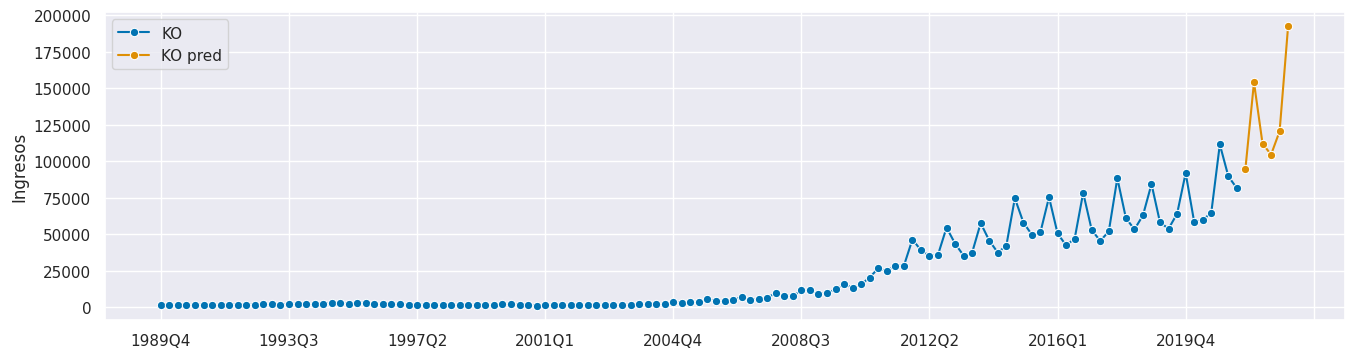

In [93]:
plot_series(y, aapl_pred, labels=["KO", "KO pred"])